In [31]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O

import os
for dirname, _, filesnames in os.walk('/kaggle/input'):
    for filename in filesnames:
        print(os.path.join(dirname, filename))

In [32]:
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

pd.options.display.max_columns = None
pd.options.display.max_rows = None
pd.options.display.max_colwidth = None

def annotate_bar_plot(barplot, fontsize=12, num_type=float):
    for bar in barplot.patches:
        position = (bar.get_x() + bar.get_width() / 2, bar.get_height())
        text = f'{bar.get_height():.2f}' if num_type == float else f'{bar.get_height():g}'
        barplot.annotate(text=text, xy=position, ha='center', va='center',
                         size=fontsize, xytext=(0,8), textcoords='offset points')
        
palette = sns.color_palette('Set2')
df = pd.read_csv('student_prediction.csv')        

In [33]:
attr_map = {
    'age': {
        1: '18-21',
        2: '22-25',
        3: 'Above 26'
    },
    'gender': {1: 'Female', 2: 'Male'},
    'hs_type': {
        1: 'Private',
        2: 'State',
        3: 'Other'
    },
    'scholarship': {
        1: '0%',
        2: '25%',
        3: '50%',
        4: '75%',
        5: '100%'
    }, 
    'work': {1: 'Yes', 2: 'No'}, 
    'activity': {1: 'Yes', 2: 'No'},
    'partner': {1: 'Yes', 2: 'No'},
    'salary': {
        1: '$135-200',
        2: '$201-270',
        3: '$271-340',
        4: '$341-410',
        5: 'Above $410',
    },
    'transport': {
        1: 'Bus',
        2: 'Private car/taxi',
        3: 'Bicycle',
        4: 'Other'
    }, 
    'living': {
        1: 'Rental',
        2: 'Dormitory',
        3: 'With family',
        4: 'Other'
    },
    'mother_edu': {
        1: 'Primary school',
        2: 'Secondary school',
        3: 'High school',
        4: 'University',
        5: 'MSc.',
        6: 'Ph.D.'
    },
    'father_edu': {
        1: 'Primary school',
        2: 'Secondary school',
        3: 'High school',
        4: 'University',
        5: 'MSc.',
        6: 'Ph.D.'
    }, 
    'kids': {
        1: 'Married',
        2: 'Divorced',
        3: 'Died - one of them or both'
    },
    'mother_job': {
        1: 'Retired',
        2: 'Housewife',
        3: 'Government officer',
        4: 'Private sector employee',
        5: 'Self-employment',
        6: 'Other'
    },
    'father_job': {
        1: 'Retired',
        2: 'Government officer',
        3: 'Private sector employee',
        4: 'Self-employment',
        5: 'Other'
    },
    'study_hrs': {
        1: 'None',
        2: '<5 hours',
        3: '6-10 hours',
        4: '11-20 hours',
        5: 'More than 20 hours'
    },
    'read_freq': {
        1: 'Never',
        2: 'Sometimes',
        3: 'Often'
    },
    'read_freq_sci': {
        1: 'Never',
        2: 'Sometimes',
        3: 'Often'
    },
    'attend_dept': {1: 'Yes', 2: 'No'},
    'impact': {
        1: 'Positive',
        2: 'Negative',
        3: 'Neutral'
    },
    'attend': {1: 'Yes', 2: 'No'},
    'prep_study': {
        1: 'Alone',
        2: 'With friends',
        3: 'Not applicable'
    },
    'prep_exam': {
        1: 'Closest date to the exam', 
        2: 'Regularly during the semester',
        3: 'Never'
    },
    'notes': {
        1: 'Never',
        2: 'Sometimes',
        3: 'Always'
    },
    'listens': {
        1: 'Never',
        2: 'Sometimes',
        3: 'Always'
    },
    'likes_discuss': {
        1: 'Never',
        2: 'Sometimes',
        3: 'Always'
    },
    'classroom': {
        1: 'Not useful',
        2: 'Useful',
        3: 'Not applicable'
    },
    'cuml_gpa': {
        1: '<2.00',
        2: '2.00-2.49',
        3: '2.50-2.99',
        4: '3.00-3.49',
        5: 'Above 3.49'
    },
    'exp_gpa': {
        1: '<2.00',
        2: '2.00-2.49',
        3: '2.50-2.99',
        4: '3.00-3.49',
        5: 'Above 3.49'
    }
}

In [34]:

df.columns = [x.lower() for x in df.columns]
for col in df.columns.tolist():
    if col not in list(attr_map.keys()):
        continue
    if col == '#_siblings':
        df[col].apply(lambda x: '5 or above' if x == 5 else str(x))
    else:
        df[col] = df[col].map(attr_map[col])
df.head()

,studentid,age,gender,hs_type,scholarship,work,activity,partner,salary,transport,living,mother_edu,father_edu,#_siblings,kids,mother_job,father_job,study_hrs,read_freq,read_freq_sci,attend_dept,impact,attend,prep_study,prep_exam,notes,listens,likes_discuss,classroom,cuml_gpa,exp_gpa,course id,grade
0,STUDENT1,22-25,Male,Other,50%,Yes,No,No,$135-200,Bus,Rental,Primary school,Secondary school,3,Married,Housewife,Other,6-10 hours,Sometimes,Sometimes,Yes,Positive,Yes,Alone,Closest date to the exam,Always,Sometimes,Never,Useful,<2.00,<2.00,1,1
1,STUDENT2,22-25,Male,Other,50%,Yes,No,No,$135-200,Bus,Rental,Secondary school,High school,2,Married,Housewife,Retired,<5 hours,Sometimes,Sometimes,Yes,Positive,Yes,Alone,Closest date to the exam,Always,Sometimes,Always,Useful,2.00-2.49,2.50-2.99,1,1
2,STUDENT3,22-25,Male,State,50%,No,No,No,$201-270,Other,Dormitory,Secondary school,Secondary school,2,Married,Housewife,Retired,<5 hours,Never,Sometimes,Yes,Positive,Yes,Alone,Closest date to the exam,Sometimes,Sometimes,Never,Not useful,2.00-2.49,2.00-2.49,1,1
3,STUDENT4,18-21,Female,Private,50%,Yes,No,Yes,$201-270,Bus,Dormitory,Primary school,Secondary school,5,Married,Housewife,Retired,6-10 hours,Never,Sometimes,Yes,Positive,Yes,Alone,Regularly during the semester,Always,Sometimes,Sometimes,Not useful,2.50-2.99,2.00-2.49,1,1
4,STUDENT5,22-25,Male,Private,50%,No,No,Yes,$271-340,Bus,Other,High school,High school,2,Married,Housewife,Self-employment,<5 hours,Never,Never,Yes,Positive,Yes,With friends,Closest date to the exam,Sometimes,Sometimes,Sometimes,Not useful,2.00-2.49,2.00-2.49,1,1


In [35]:
df['grade'].mean()

3.2275862068965515

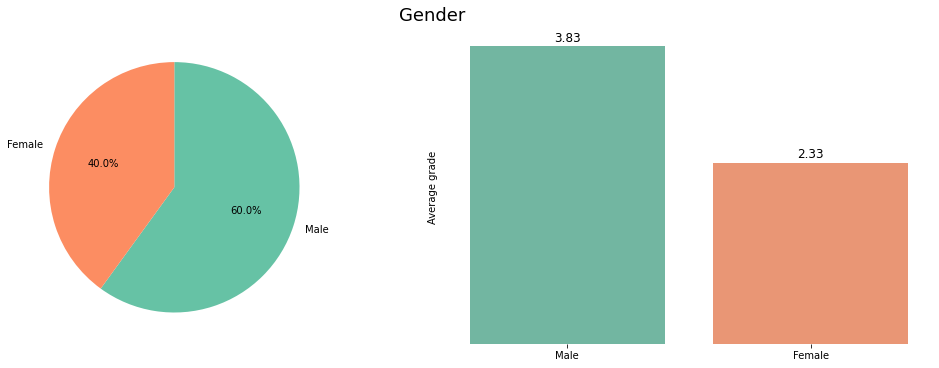

In [36]:
data = df['gender'].value_counts(normalize=True) * 100

fig = plt.figure(figsize=(14, 5), constrained_layout=True)

plt.subplot(121)
plt.pie(data, labels=data.index, startangle=90, counterclock=False, autopct='%1.1f%%', colors=palette)

data = df.groupby('gender')['grade'].mean().sort_values(ascending=False)

plt.subplot(122)
bp = sns.barplot(x=data.index, y=data, palette=palette)
annotate_bar_plot(barplot=bp)
plt.xlabel('')
plt.ylabel('Average grade')
plt.yticks([])
plt.box(False)

fig.suptitle('Gender', fontsize=18)
plt.show()

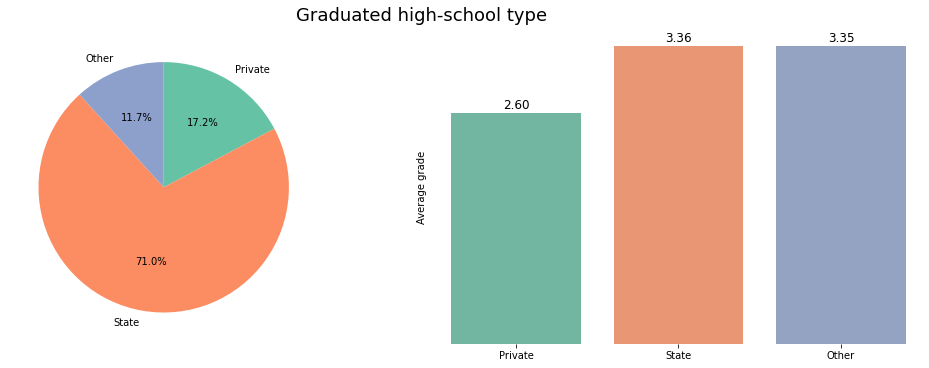

In [37]:
order = list(attr_map['hs_type'].values())
data = df['hs_type'].value_counts(normalize=True) * 100
data = data.loc[order]

fig = plt.figure(figsize=(14, 5), constrained_layout=True)

plt.subplot(121)
plt.pie(data, labels=data.index, startangle=90, counterclock=False, autopct='%1.1f%%', colors=palette)

data = df.groupby('hs_type')['grade'].mean().sort_values(ascending=False)

plt.subplot(122)
bp = sns.barplot(x=data.index, y=data, order=order, palette=palette)
annotate_bar_plot(barplot=bp)
plt.xlabel('')
plt.ylabel('Average grade')
plt.yticks([])
plt.box(False)

fig.suptitle('Graduated high-school type', fontsize=18)
plt.show()

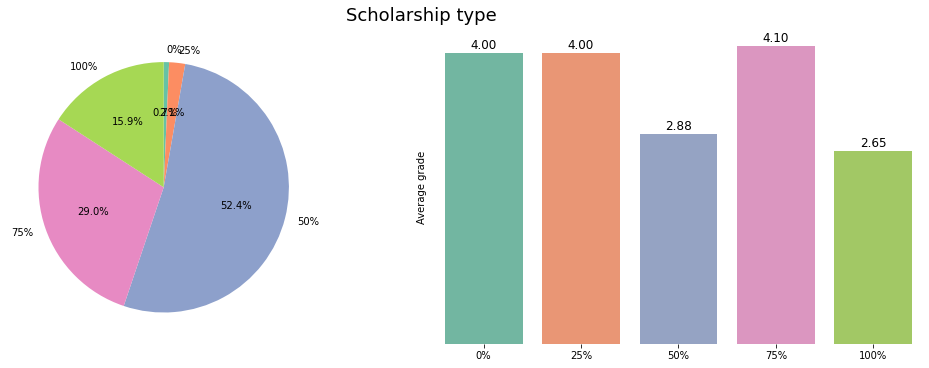

In [38]:
order = list(attr_map['scholarship'].values())
data = df['scholarship'].value_counts(normalize=True) * 100
data = data.loc[order]

fig = plt.figure(figsize=(14, 5), constrained_layout=True)

plt.subplot(121)
plt.pie(data, labels=data.index, startangle=90, counterclock=False, autopct='%1.1f%%', colors=palette)

data = df.groupby('scholarship')['grade'].mean().sort_values(ascending=False)

plt.subplot(122)
bp = sns.barplot(x=data.index, y=data, order=order, palette=palette)
annotate_bar_plot(barplot=bp)
plt.xlabel('')
plt.ylabel('Average grade')
plt.yticks([])
plt.box(False)

fig.suptitle('Scholarship type', fontsize=18)
plt.show()

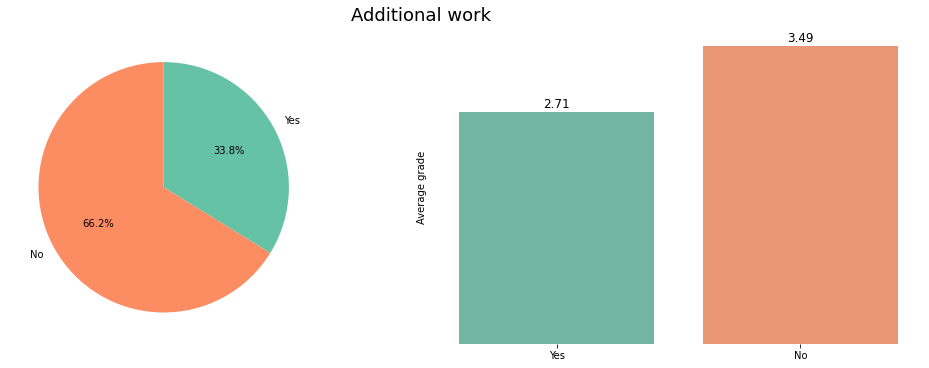

In [39]:
order = list(attr_map['work'].values())
data = df['work'].value_counts(normalize=True) * 100
data = data.loc[order]

fig = plt.figure(figsize=(14, 5), constrained_layout=True)

plt.subplot(121)
plt.pie(data, labels=data.index, startangle=90, counterclock=False, autopct='%1.1f%%', colors=palette)

data = df.groupby('work')['grade'].mean().sort_values(ascending=False)

plt.subplot(122)
bp = sns.barplot(x=data.index, y=data, order=order, palette=palette)
annotate_bar_plot(barplot=bp)
plt.xlabel('')
plt.ylabel('Average grade')
plt.yticks([])
plt.box(False)

fig.suptitle('Additional work', fontsize=18)
plt.show()

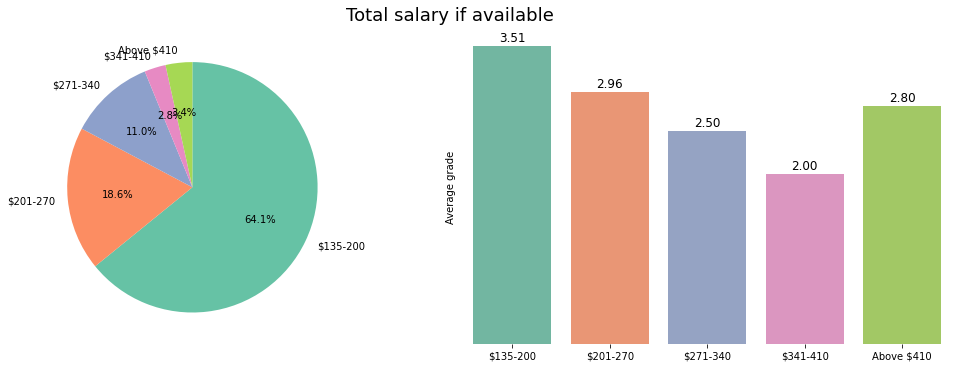

In [40]:
order = list(attr_map['salary'].values())
data = df['salary'].value_counts(normalize=True) * 100
data = data.loc[order]

fig = plt.figure(figsize=(14, 5), constrained_layout=True)

plt.subplot(121)
plt.pie(data, labels=data.index, startangle=90, counterclock=False, autopct='%1.1f%%', colors=palette)
data = df.groupby('salary')['grade'].mean().sort_values(ascending=False)

plt.subplot(122)
bp = sns.barplot(x=data.index, y=data, order=order, palette=palette)
annotate_bar_plot(barplot=bp)
plt.xlabel('')
plt.ylabel('Average grade')
plt.yticks([])
plt.box(False)

fig.suptitle('Total salary if available', fontsize=18)
plt.show()

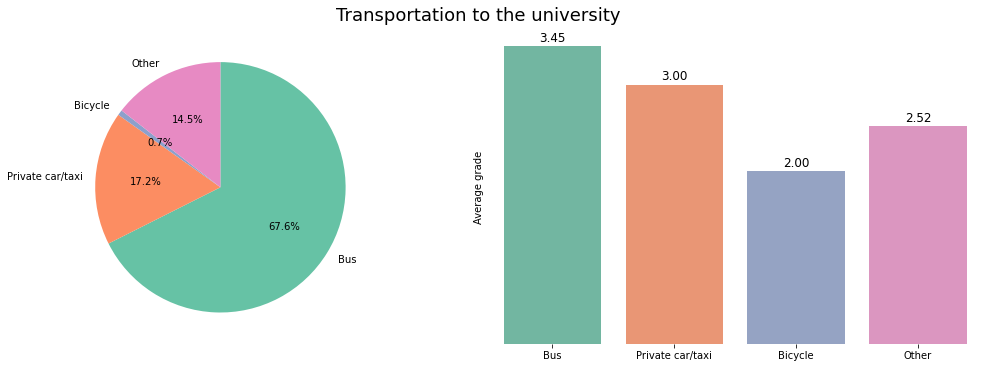

In [41]:

order = list(attr_map['transport'].values())
data = df['transport'].value_counts(normalize=True) * 100
data = data.loc[order]

fig = plt.figure(figsize=(14, 5), constrained_layout=True)

plt.subplot(121)
plt.pie(data, labels=data.index, startangle=90, counterclock=False, autopct='%1.1f%%', colors=palette)
data = df.groupby('transport')['grade'].mean().sort_values(ascending=False)

plt.subplot(122)
bp = sns.barplot(x=data.index, y=data, order=order, palette=palette)
annotate_bar_plot(barplot=bp)
plt.xlabel('')
plt.ylabel('Average grade')
plt.yticks([])
plt.box(False)

fig.suptitle('Transportation to the university', fontsize=18)
plt.show()

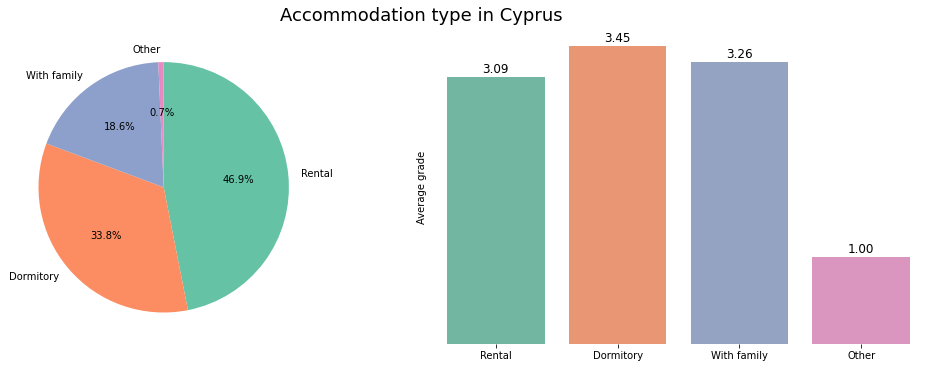

In [42]:
order = list(attr_map['living'].values())
data = df['living'].value_counts(normalize=True) * 100
data = data.loc[order]

fig = plt.figure(figsize=(14, 5), constrained_layout=True)

plt.subplot(121)
plt.pie(data, labels=data.index, startangle=90, counterclock=False, autopct='%1.1f%%', colors=palette)
data = df.groupby('living')['grade'].mean().sort_values(ascending=False)

plt.subplot(122)
bp = sns.barplot(x=data.index, y=data, order=order, palette=palette)
annotate_bar_plot(barplot=bp)
plt.xlabel('')
plt.ylabel('Average grade')
plt.yticks([])
plt.box(False)

fig.suptitle('Accommodation type in Cyprus', fontsize=18)
plt.show()

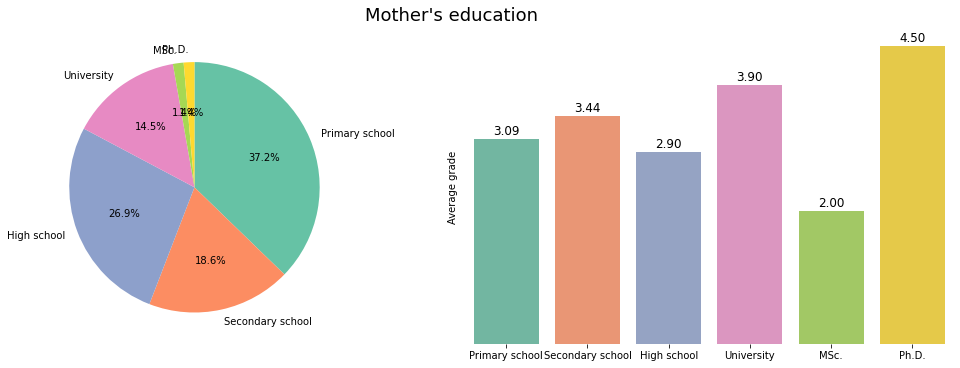

In [43]:
order = list(attr_map['mother_edu'].values())
data = df['mother_edu'].value_counts(normalize=True) * 100
data = data.loc[order]

fig = plt.figure(figsize=(14, 5), constrained_layout=True)

plt.subplot(121)
plt.pie(data, labels=data.index, startangle=90, counterclock=False, autopct='%1.1f%%', colors=palette)
data = df.groupby('mother_edu')['grade'].mean().sort_values(ascending=False)

plt.subplot(122)
bp = sns.barplot(x=data.index, y=data, order=order, palette=palette)
annotate_bar_plot(barplot=bp)
plt.xlabel('')
plt.ylabel('Average grade')
plt.yticks([])
plt.box(False)

fig.suptitle('Mother\'s education', fontsize=18)
plt.show()

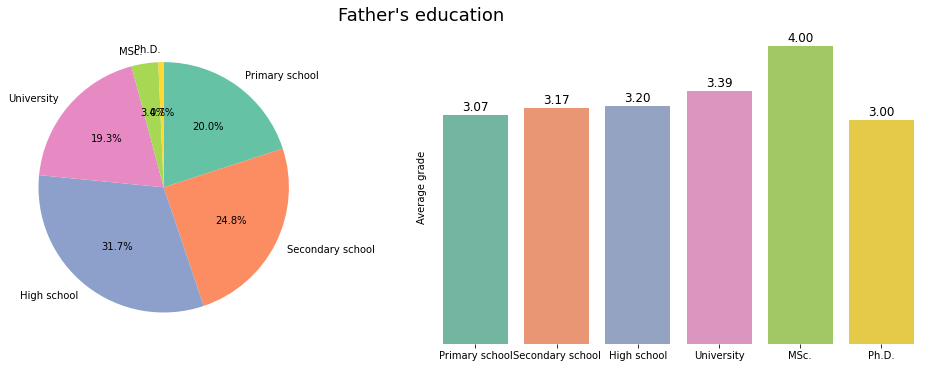

In [44]:
order = list(attr_map['father_edu'].values())
data = df['father_edu'].value_counts(normalize=True) * 100
data = data.loc[order]

fig = plt.figure(figsize=(14, 5), constrained_layout=True)

plt.subplot(121)
plt.pie(data, labels=data.index, startangle=90, counterclock=False, autopct='%1.1f%%', colors=palette)
data = df.groupby('father_edu')['grade'].mean().sort_values(ascending=False)

plt.subplot(122)
bp = sns.barplot(x=data.index, y=data, order=order, palette=palette)
annotate_bar_plot(barplot=bp)
plt.xlabel('')
plt.ylabel('Average grade')
plt.yticks([])
plt.box(False)

fig.suptitle('Father\'s education', fontsize=18)
plt.show()

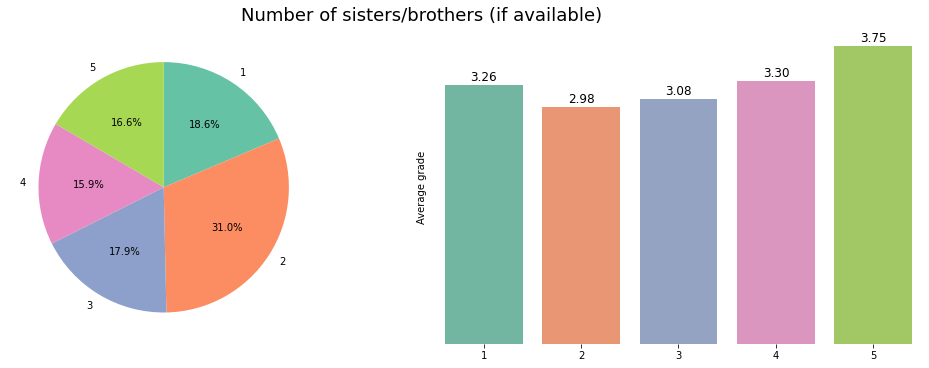

In [45]:
data = df['#_siblings'].value_counts(normalize=True) * 100
data = data.loc[list(range(1, 6))]

fig = plt.figure(figsize=(14, 5), constrained_layout=True)

plt.subplot(121)
plt.pie(data, labels=data.index, startangle=90, counterclock=False, autopct='%1.1f%%', colors=palette)
data = df.groupby('#_siblings')['grade'].mean().sort_values(ascending=False)

plt.subplot(122)
bp = sns.barplot(x=data.index, y=data, palette=palette)
annotate_bar_plot(barplot=bp)
plt.xlabel('')
plt.ylabel('Average grade')
plt.yticks([])
plt.box(False)

fig.suptitle('Number of sisters/brothers (if available)', fontsize=18)
plt.show()

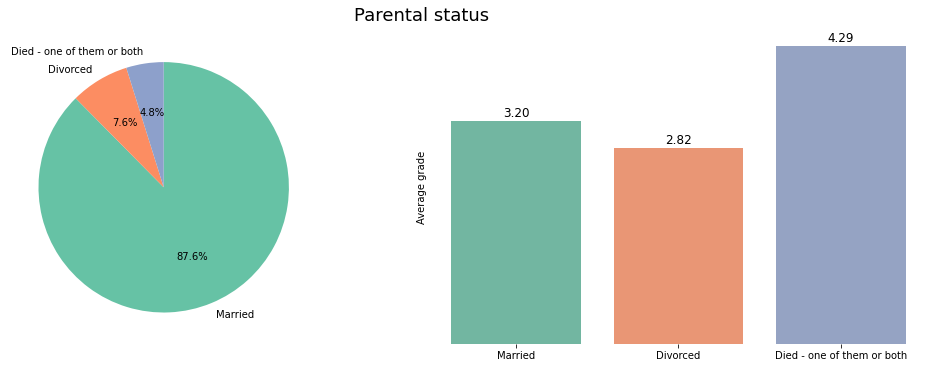

In [46]:
order = list(attr_map['kids'].values())
data = df['kids'].value_counts(normalize=True) * 100
data = data.loc[order]

fig = plt.figure(figsize=(14, 5), constrained_layout=True)

plt.subplot(121)
plt.pie(data, labels=data.index, startangle=90, counterclock=False, autopct='%1.1f%%', colors=palette)
data = df.groupby('kids')['grade'].mean().sort_values(ascending=False)

plt.subplot(122)
bp = sns.barplot(x=data.index, y=data, order=order, palette=palette)
annotate_bar_plot(barplot=bp)
plt.xlabel('')
plt.ylabel('Average grade')
plt.yticks([])
plt.box(False)

fig.suptitle('Parental status', fontsize=18)
plt.show()

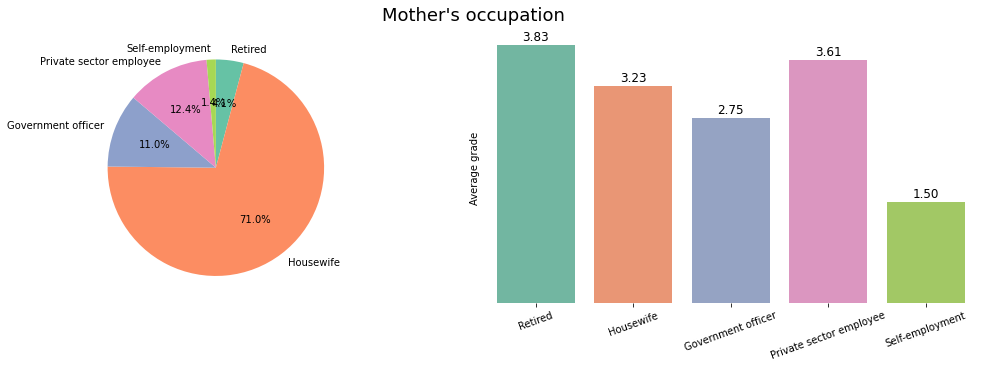

In [47]:

order = list(attr_map['mother_job'].values())
order.remove('Other')
data = df['mother_job'].value_counts(normalize=True) * 100
data = data.loc[order]

fig = plt.figure(figsize=(14, 5), constrained_layout=True)

plt.subplot(121)
plt.pie(data, labels=data.index, startangle=90, counterclock=False, autopct='%1.1f%%', colors=palette)
data = df.groupby('mother_job')['grade'].mean().sort_values(ascending=False)

plt.subplot(122)
bp = sns.barplot(x=data.index, y=data, order=order, palette=palette)
annotate_bar_plot(barplot=bp)
plt.xlabel('')
plt.ylabel('Average grade')
plt.xticks(rotation=20)
plt.yticks([])
plt.box(False)

fig.suptitle('Mother\'s occupation', fontsize=18)
plt.show()

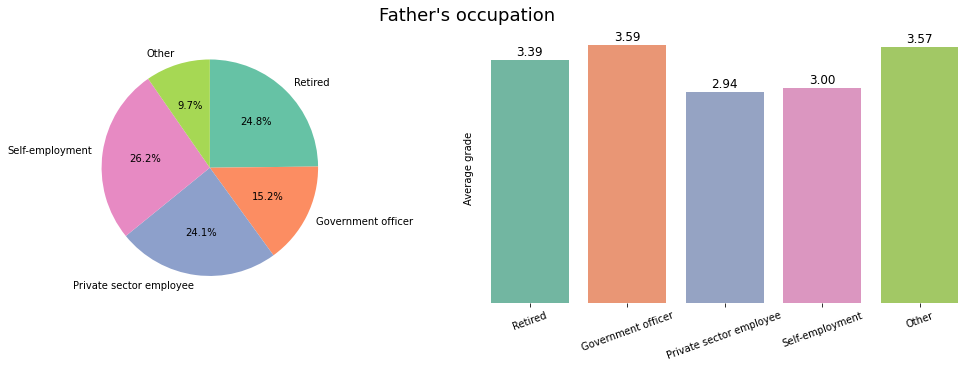

In [48]:
order = list(attr_map['father_job'].values())
# order.remove('Other')
data = df['father_job'].value_counts(normalize=True) * 100
data = data.loc[order]

fig = plt.figure(figsize=(14, 5), constrained_layout=True)

plt.subplot(121)
plt.pie(data, labels=data.index, startangle=90, counterclock=False, autopct='%1.1f%%', colors=palette)
data = df.groupby('father_job')['grade'].mean().sort_values(ascending=False)

plt.subplot(122)
bp = sns.barplot(x=data.index, y=data, order=order, palette=palette)
annotate_bar_plot(barplot=bp)
plt.xlabel('')
plt.ylabel('Average grade')
plt.xticks(rotation=20)
plt.yticks([])
plt.box(False)

fig.suptitle('Father\'s occupation', fontsize=18)
plt.show()

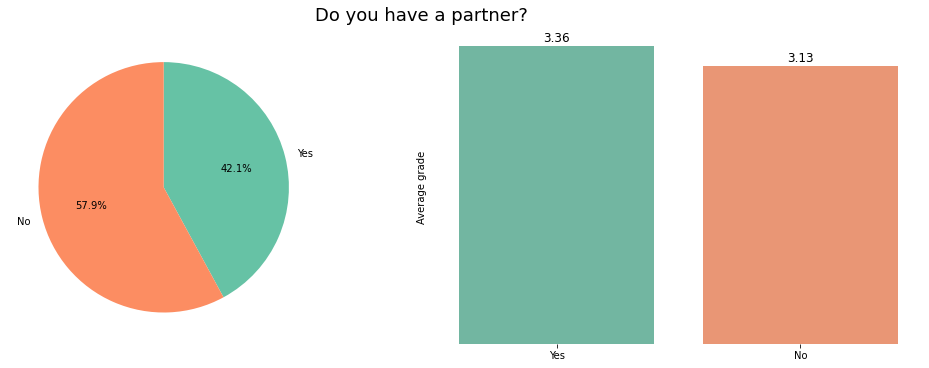

In [49]:

order = list(attr_map['partner'].values())
data = df['partner'].value_counts(normalize=True) * 100
data = data.loc[order]

fig = plt.figure(figsize=(14, 5), constrained_layout=True)

plt.subplot(121)
plt.pie(data, labels=data.index, startangle=90, counterclock=False, autopct='%1.1f%%', colors=palette)

data = df.groupby('partner')['grade'].mean().sort_values(ascending=False)

plt.subplot(122)
bp = sns.barplot(x=data.index, y=data, order=order, palette=palette)
annotate_bar_plot(barplot=bp)
plt.xlabel('')
plt.ylabel('Average grade')
plt.yticks([])
plt.box(False)

fig.suptitle('Do you have a partner?', fontsize=18)
plt.show()

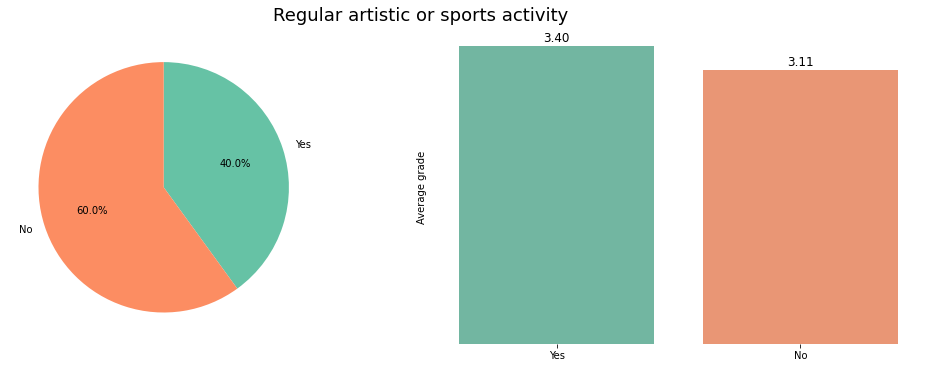

In [50]:
order = list(attr_map['activity'].values())
data = df['activity'].value_counts(normalize=True) * 100
data = data.loc[order]

fig = plt.figure(figsize=(14, 5), constrained_layout=True)

plt.subplot(121)
plt.pie(data, labels=data.index, startangle=90, counterclock=False, autopct='%1.1f%%', colors=palette)

data = df.groupby('activity')['grade'].mean().sort_values(ascending=False)

plt.subplot(122)
bp = sns.barplot(x=data.index, y=data, order=order, palette=palette)
annotate_bar_plot(barplot=bp)
plt.xlabel('')
plt.ylabel('Average grade')
plt.yticks([])
plt.box(False)

fig.suptitle('Regular artistic or sports activity', fontsize=18)
plt.show()

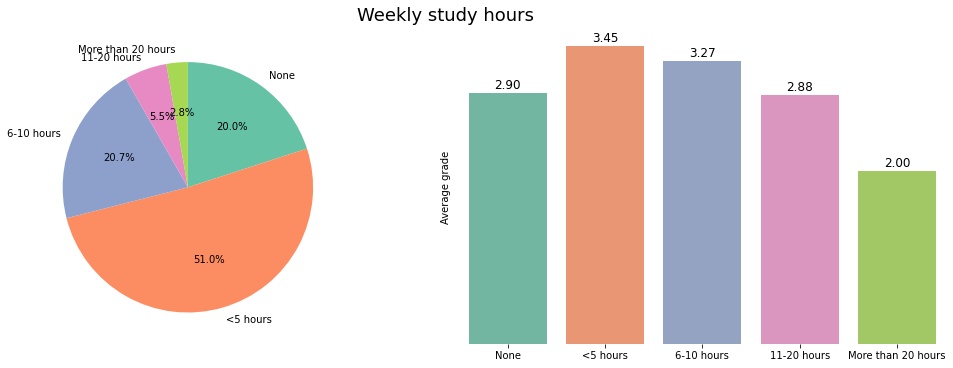

In [51]:
order = list(attr_map['study_hrs'].values())
data = df['study_hrs'].value_counts(normalize=True) * 100
data = data.loc[order]

fig = plt.figure(figsize=(14, 5), constrained_layout=True)

plt.subplot(121)
plt.pie(data, labels=data.index, startangle=90, counterclock=False, autopct='%1.1f%%', colors=palette)
data = df.groupby('study_hrs')['grade'].mean().sort_values(ascending=False)

plt.subplot(122)
bp = sns.barplot(x=data.index, y=data, order=order, palette=palette)
annotate_bar_plot(barplot=bp)
plt.xlabel('')
plt.ylabel('Average grade')
plt.yticks([])
plt.box(False)

fig.suptitle('Weekly study hours', fontsize=18)
plt.show()

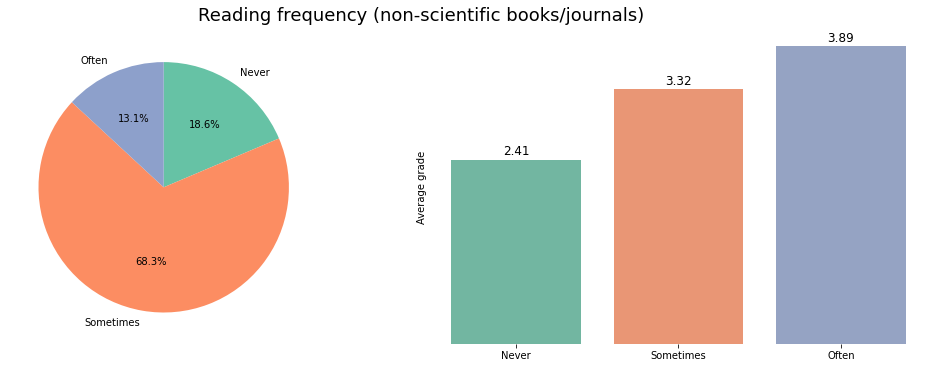

In [52]:

order = list(attr_map['read_freq'].values())
data = df['read_freq'].value_counts(normalize=True) * 100
data = data.loc[order]

fig = plt.figure(figsize=(14, 5), constrained_layout=True)

plt.subplot(121)
plt.pie(data, labels=data.index, startangle=90, counterclock=False, autopct='%1.1f%%', colors=palette)
data = df.groupby('read_freq')['grade'].mean().sort_values(ascending=False)

plt.subplot(122)
bp = sns.barplot(x=data.index, y=data, order=order, palette=palette)
annotate_bar_plot(barplot=bp)
plt.xlabel('')
plt.ylabel('Average grade')
plt.yticks([])
plt.box(False)

fig.suptitle('Reading frequency (non-scientific books/journals)', fontsize=18)
plt.show()

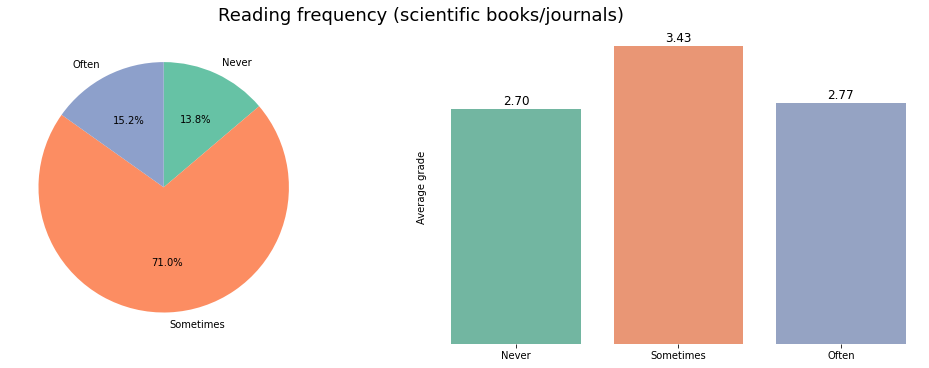

In [53]:
order = list(attr_map['read_freq_sci'].values())
data = df['read_freq_sci'].value_counts(normalize=True) * 100
data = data.loc[order]

fig = plt.figure(figsize=(14, 5), constrained_layout=True)

plt.subplot(121)
plt.pie(data, labels=data.index, startangle=90, counterclock=False, autopct='%1.1f%%', colors=palette)
data = df.groupby('read_freq_sci')['grade'].mean().sort_values(ascending=False)

plt.subplot(122)
bp = sns.barplot(x=data.index, y=data, order=order, palette=palette)
annotate_bar_plot(barplot=bp)
plt.xlabel('')
plt.ylabel('Average grade')
plt.yticks([])
plt.box(False)

fig.suptitle('Reading frequency (scientific books/journals)', fontsize=18)
plt.show()

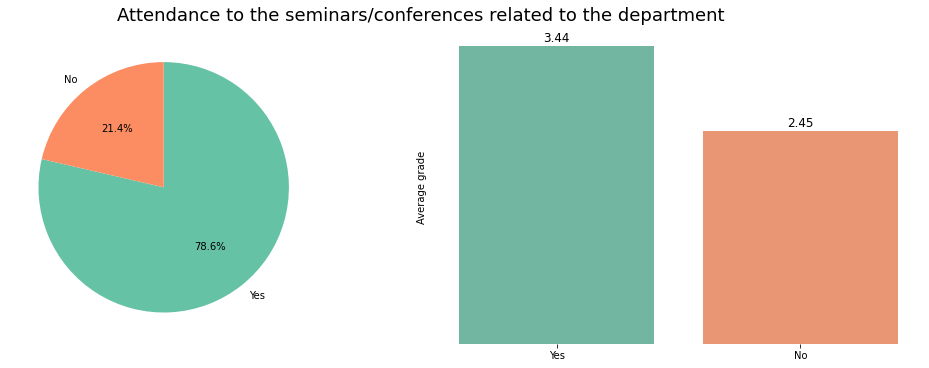

In [54]:
data = df['attend_dept'].value_counts(normalize=True) * 100

fig = plt.figure(figsize=(14, 5), constrained_layout=True)

plt.subplot(121)
plt.pie(data, labels=data.index, startangle=90, counterclock=False, autopct='%1.1f%%', colors=palette)

data = df.groupby('attend_dept')['grade'].mean().sort_values(ascending=False)

plt.subplot(122)
bp = sns.barplot(x=data.index, y=data, palette=palette)
annotate_bar_plot(barplot=bp)
plt.xlabel('')
plt.ylabel('Average grade')
plt.yticks([])
plt.box(False)

fig.suptitle('Attendance to the seminars/conferences related to the department', fontsize=18)
plt.show()

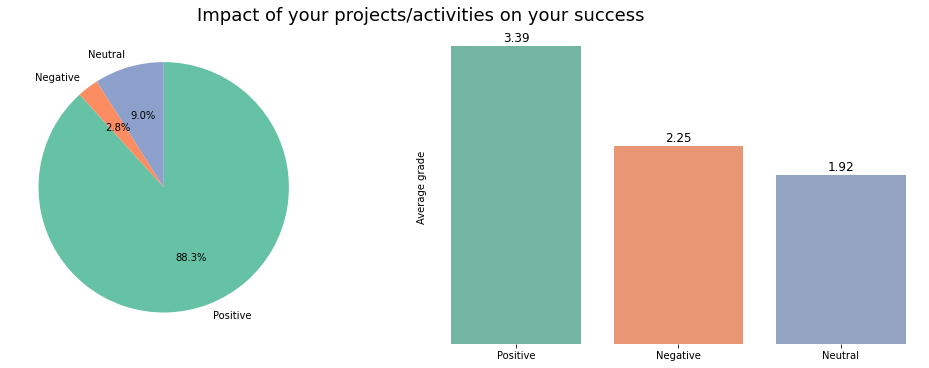

In [55]:
order = list(attr_map['impact'].values())
data = df['impact'].value_counts(normalize=True) * 100
data = data.loc[order]

fig = plt.figure(figsize=(14, 5), constrained_layout=True)

plt.subplot(121)
plt.pie(data, labels=data.index, startangle=90, counterclock=False, autopct='%1.1f%%', colors=palette)
data = df.groupby('impact')['grade'].mean().sort_values(ascending=False)

plt.subplot(122)
bp = sns.barplot(x=data.index, y=data, order=order, palette=palette)
annotate_bar_plot(barplot=bp)
plt.xlabel('')
plt.ylabel('Average grade')
plt.yticks([])
plt.box(False)

fig.suptitle('Impact of your projects/activities on your success', fontsize=18)
plt.show()

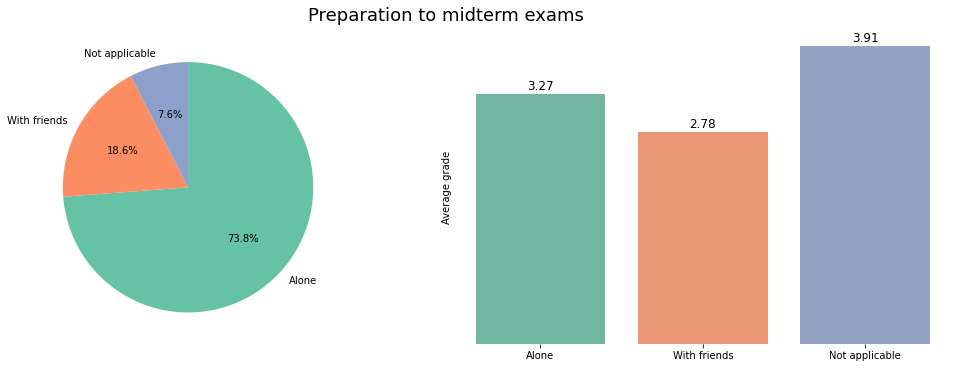

In [56]:
order = list(attr_map['prep_study'].values())
data = df['prep_study'].value_counts(normalize=True) * 100
data = data.loc[order]

fig = plt.figure(figsize=(14, 5), constrained_layout=True)

plt.subplot(121)
plt.pie(data, labels=data.index, startangle=90, counterclock=False, autopct='%1.1f%%', colors=palette)
data = df.groupby('prep_study')['grade'].mean().sort_values(ascending=False)

plt.subplot(122)
bp = sns.barplot(x=data.index, y=data, order=order, palette=palette)
annotate_bar_plot(barplot=bp)
plt.xlabel('')
plt.ylabel('Average grade')
plt.yticks([])
plt.box(False)

fig.suptitle('Preparation to midterm exams', fontsize=18)
plt.show()

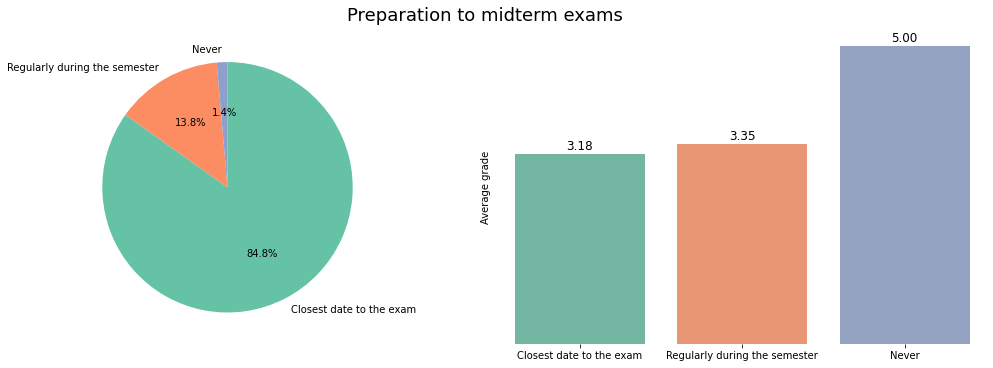

In [57]:
order = list(attr_map['prep_exam'].values())
data = df['prep_exam'].value_counts(normalize=True) * 100
data = data.loc[order]

fig = plt.figure(figsize=(14, 5), constrained_layout=True)

plt.subplot(121)
plt.pie(data, labels=data.index, startangle=90, counterclock=False, autopct='%1.1f%%', colors=palette)
data = df.groupby('prep_exam')['grade'].mean().sort_values(ascending=False)

plt.subplot(122)
bp = sns.barplot(x=data.index, y=data, order=order, palette=palette)
annotate_bar_plot(barplot=bp)
plt.xlabel('')
plt.ylabel('Average grade')
plt.yticks([])
plt.box(False)

fig.suptitle('Preparation to midterm exams', fontsize=18)
plt.show()


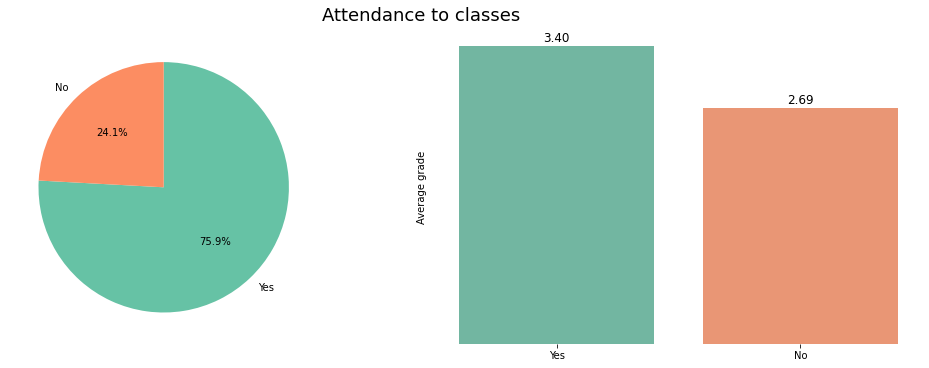

In [58]:

order = list(attr_map['attend'].values())
data = df['attend'].value_counts(normalize=True) * 100
data = data.loc[order]

fig = plt.figure(figsize=(14, 5), constrained_layout=True)

plt.subplot(121)
plt.pie(data, labels=data.index, startangle=90, counterclock=False, autopct='%1.1f%%', colors=palette)
data = df.groupby('attend')['grade'].mean().sort_values(ascending=False)

plt.subplot(122)
bp = sns.barplot(x=data.index, y=data, order=order, palette=palette)
annotate_bar_plot(barplot=bp)
plt.xlabel('')
plt.ylabel('Average grade')
plt.yticks([])
plt.box(False)

fig.suptitle('Attendance to classes', fontsize=18)
plt.show()

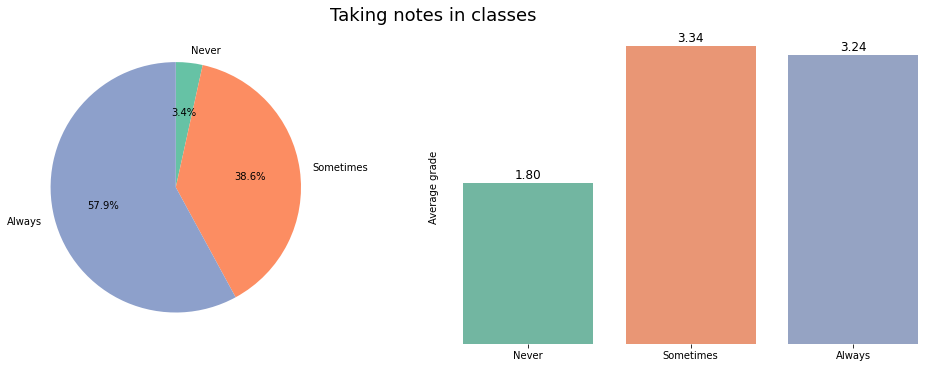

In [59]:

order = list(attr_map['notes'].values())
data = df['notes'].value_counts(normalize=True) * 100
data = data.loc[order]

fig = plt.figure(figsize=(14, 5), constrained_layout=True)

plt.subplot(121)
plt.pie(data, labels=data.index, startangle=90, counterclock=False, autopct='%1.1f%%', colors=palette)
data = df.groupby('notes')['grade'].mean().sort_values(ascending=False)

plt.subplot(122)
bp = sns.barplot(x=data.index, y=data, order=order, palette=palette)
annotate_bar_plot(barplot=bp)
plt.xlabel('')
plt.ylabel('Average grade')
plt.yticks([])
plt.box(False)

fig.suptitle('Taking notes in classes', fontsize=18)
plt.show()

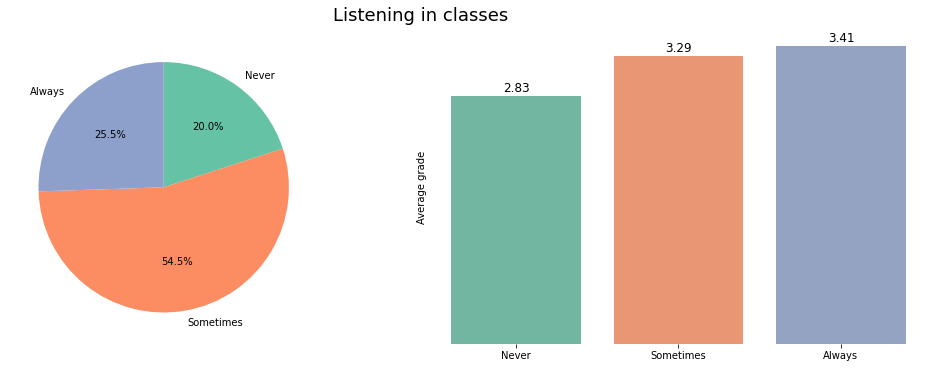

In [60]:
order = list(attr_map['listens'].values())
data = df['listens'].value_counts(normalize=True) * 100
data = data.loc[order]

fig = plt.figure(figsize=(14, 5), constrained_layout=True)

plt.subplot(121)
plt.pie(data, labels=data.index, startangle=90, counterclock=False, autopct='%1.1f%%', colors=palette)
data = df.groupby('listens')['grade'].mean().sort_values(ascending=False)

plt.subplot(122)
bp = sns.barplot(x=data.index, y=data, order=order, palette=palette)
annotate_bar_plot(barplot=bp)
plt.xlabel('')
plt.ylabel('Average grade')
plt.yticks([])
plt.box(False)

fig.suptitle('Listening in classes', fontsize=18)
plt.show()

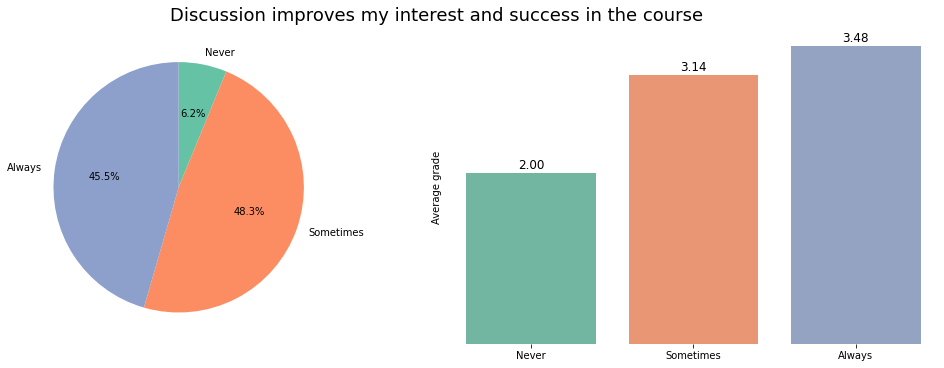

In [61]:
order = list(attr_map['likes_discuss'].values())
data = df['likes_discuss'].value_counts(normalize=True) * 100
data = data.loc[order]

fig = plt.figure(figsize=(14, 5), constrained_layout=True)

plt.subplot(121)
plt.pie(data, labels=data.index, startangle=90, counterclock=False, autopct='%1.1f%%', colors=palette)
data = df.groupby('likes_discuss')['grade'].mean().sort_values(ascending=False)

plt.subplot(122)
bp = sns.barplot(x=data.index, y=data, order=order, palette=palette)
annotate_bar_plot(barplot=bp)
plt.xlabel('')
plt.ylabel('Average grade')
plt.yticks([])
plt.box(False)

fig.suptitle('Discussion improves my interest and success in the course', fontsize=18)
plt.show()

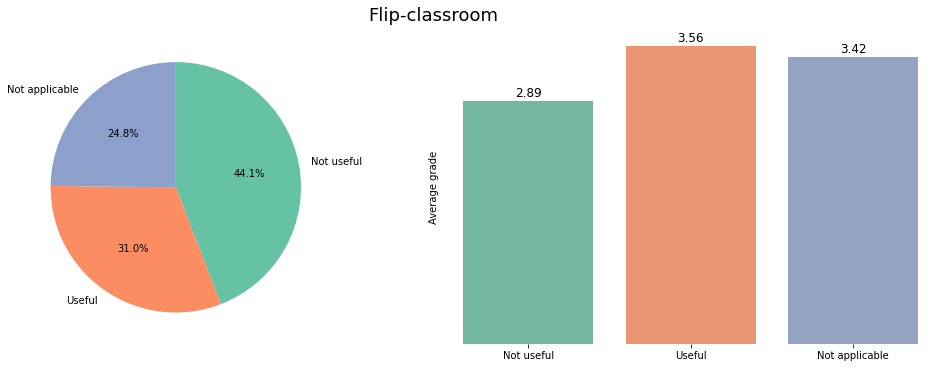

In [62]:
order = list(attr_map['classroom'].values())
data = df['classroom'].value_counts(normalize=True) * 100
data = data.loc[order]

fig = plt.figure(figsize=(14, 5), constrained_layout=True)

plt.subplot(121)
plt.pie(data, labels=data.index, startangle=90, counterclock=False, autopct='%1.1f%%', colors=palette)
data = df.groupby('classroom')['grade'].mean().sort_values(ascending=False)

plt.subplot(122)
bp = sns.barplot(x=data.index, y=data, order=order, palette=palette)
annotate_bar_plot(barplot=bp)
plt.xlabel('')
plt.ylabel('Average grade')
plt.yticks([])
plt.box(False)

fig.suptitle('Flip-classroom', fontsize=18)
plt.show()

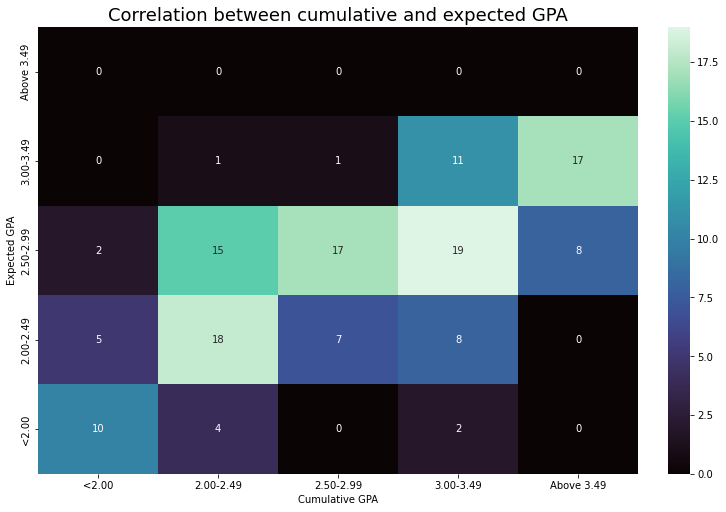

In [63]:
order = list(attr_map['cuml_gpa'].values())
gpa_sort_key = {v:k for k, v in attr_map['cuml_gpa'].items()}

data = df.groupby(['cuml_gpa', 'exp_gpa']).size().reset_index()
data.sort_values(by=['cuml_gpa', 'exp_gpa'], key=lambda x: x.map(gpa_sort_key), inplace=True)
data.rename(columns={0: 'counts'}, inplace=True)
data = data.pivot(index='cuml_gpa', columns='exp_gpa').fillna(0)
data.columns = data.columns.droplevel(0)
data = data.loc[order]
data[order[-1]] = 0
order.reverse()
data = data[order]

plt.figure(figsize=(10, 7), constrained_layout=True)
sns.heatmap(data.T.astype(int), annot=True, fmt='d', cmap='mako')
plt.xlabel('Cumulative GPA')
plt.ylabel('Expected GPA')
plt.title('Correlation between cumulative and expected GPA', fontsize=18)
plt.show()

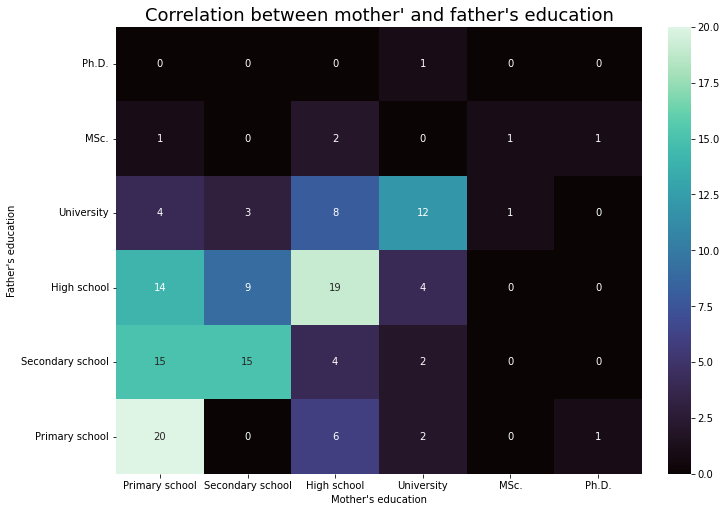

In [64]:

order = list(attr_map['mother_edu'].values())
sort_key = {v:k for k, v in attr_map['mother_edu'].items()}

data = df.groupby(['mother_edu', 'father_edu']).size().reset_index()
data.sort_values(by=['mother_edu', 'father_edu'], key=lambda x: x.map(sort_key), inplace=True)
data.rename(columns={0: 'counts'}, inplace=True)
data = data.pivot(index='mother_edu', columns='father_edu').fillna(0)
data.columns = data.columns.droplevel(0)
data = data.loc[order]
order.reverse()
data = data[order]

plt.figure(figsize=(10, 7), constrained_layout=True)
sns.heatmap(data.T.astype(int), annot=True, fmt='d', cmap='mako')
plt.xlabel('Mother\'s education')
plt.ylabel('Father\'s education')
plt.title('Correlation between mother\' and father\'s education', fontsize=18)
plt.show()

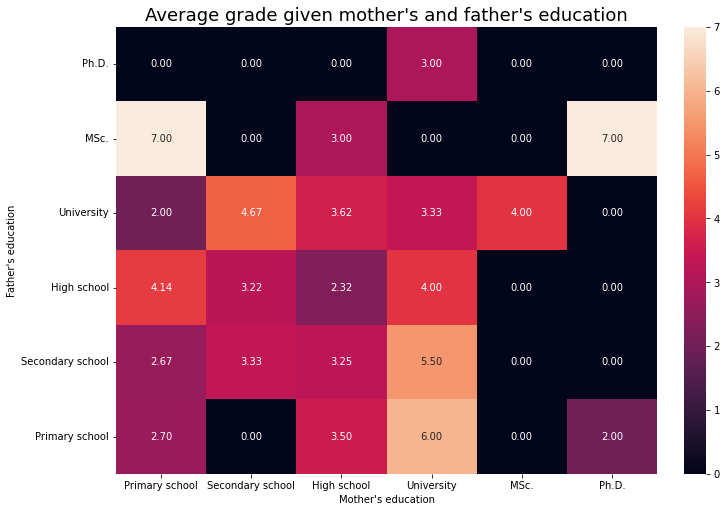

In [66]:
order = list(attr_map['mother_edu'].values())
sort_key = {v:k for k, v in attr_map['mother_edu'].items()}

data = df.groupby(['mother_edu', 'father_edu'])['grade'].mean().reset_index()
data.sort_values(by=['mother_edu', 'father_edu'], key=lambda x: x.map(sort_key), inplace=True)
data = data.pivot(index='mother_edu', columns='father_edu').fillna(0)
data.columns = data.columns.droplevel(0)
data = data.loc[order]
order.reverse()
data = data[order]

plt.figure(figsize=(10, 7), constrained_layout=True)
sns.heatmap(data.T, annot=True, fmt='.2f')
plt.xlabel('Mother\'s education')
plt.ylabel('Father\'s education')
plt.title('Average grade given mother\'s and father\'s education', fontsize=18)
plt.show()